In [2]:
#the input file here was created by uploading the feature table to the FBMN stats app for blank removal (0.3), imputation and TIC normalization, followed by download and manual transposition/reformating to standard format
import pandas as pd

# Load the CSV file
df = pd.read_csv('CMN_featuretable_reformated_blnkrem_transposed_format.csv', index_col='row ID')

# Convert to presence-absence format
presence_absence_df = df.applymap(lambda x: 1 if x > 0 else 0)

# Remove the string ' Peak area' from all column headers
presence_absence_df.columns = presence_absence_df.columns.str.replace(' Peak area', '')

# Save the new DataFrame to a CSV file
presence_absence_df.to_csv('featuretable_reformated_Interlaballmixes_CMN_presence_absence_format.csv')

print("The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.")

The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.


In [3]:
import pandas as pd
import re

# Step 1: Load the presence-absence feature table
presence_absence_df = pd.read_csv('featuretable_reformated_Interlaballmixes_CMN_presence_absence_format.csv', index_col='row ID')

# Step 2: Load the metadata
metadata_df = pd.read_csv('merged_metadata.tsv', sep='\t')

# Step 3: Clean the 'filename' column by stripping extensions
metadata_df['filename_clean'] = metadata_df['filename'].apply(lambda x: re.sub(r'\.mzML$|\.mzXML$', '', x, flags=re.IGNORECASE))

# Step 4: Map each sample to its lab
sample_to_lab = metadata_df.set_index('filename_clean')['ATTRIBUTE_Lab'].to_dict()

# Step 5: Filter feature table columns to those present in metadata
valid_samples = [col for col in presence_absence_df.columns if col in sample_to_lab]
filtered_df = presence_absence_df[valid_samples]

# Step 6: Group columns by lab and apply the aggregation rule
lab_groups = {}
for sample, lab in sample_to_lab.items():
    lab_groups.setdefault(lab, []).append(sample)

# Step 7: Create a new DataFrame with one column per lab, prefixed with "Lab "
lab_aggregated_df = pd.DataFrame(index=filtered_df.index)

for lab, samples in lab_groups.items():
    samples_in_df = [s for s in samples if s in filtered_df.columns]
    lab_column_name = f"Lab {lab}"
    lab_aggregated_df[lab_column_name] = (filtered_df[samples_in_df].sum(axis=1) > 0).astype(int)

# Optional: Save the result
lab_aggregated_df.to_csv('lab_aggregated_featuretable_CMN.csv')

# Calculating top100 and top1000

In [4]:
import pandas as pd

# 1. Load the modified feature table
feature_df = pd.read_csv('CMN_featuretable_reformated_blnkrem_transposed_format.csv', index_col='row ID')

# 2. Identify sample columns (those containing 'MS')
sample_columns = [col for col in feature_df.columns if 'MS' in col]

# 3. Compute 'Average_Abundance' (ignoring zero values)
feature_df['Average_Abundance'] = feature_df[sample_columns].replace(0, pd.NA).mean(axis=1)

# 4. Sort rows by 'Total_Abundance' in descending order
sorted_df = feature_df.sort_values(by='Average_Abundance', ascending=False)

# 5. Select top 1000 and top 100 rows
top_1000_df = sorted_df.head(1000)
top_100_df = sorted_df.head(100)

# 6. Save the filtered dataframes to CSV files (keeping all original columns)
top_1000_df.to_csv('CMN_featuretable_top_1000_features.csv', index=True)
top_100_df.to_csv('CMN_featuretable_top_100_features.csv', index=True)

print("Files saved:")
print("- Top 1000 features: 'featuretable_top_1000_features.csv'")
print("- Top 100 features: 'featuretable_top_100_features.csv'")

Files saved:
- Top 1000 features: 'featuretable_top_1000_features.csv'
- Top 100 features: 'featuretable_top_100_features.csv'


In [5]:
#the input file here was created by uploading the feature table to the FBMN stats app for blank removal (0.3), imputation and TIC normalization, followed by download and manual transposition/reformating to standard format
import pandas as pd

# Load the CSV file
df = pd.read_csv('CMN_featuretable_top_1000_features.csv', index_col='row ID')

# Convert to presence-absence format
presence_absence_df = df.applymap(lambda x: 1 if x > 0 else 0)

# Remove the string ' Peak area' from all column headers
presence_absence_df.columns = presence_absence_df.columns.str.replace(' Peak area', '')

# Save the new DataFrame to a CSV file
presence_absence_df.to_csv('top_1000_features_CMN_presence_absence_format.csv')

print("The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.")

The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.


In [6]:
import pandas as pd
import re

# Step 1: Load the presence-absence feature table
presence_absence_df = pd.read_csv('top_1000_features_CMN_presence_absence_format.csv', index_col='row ID')

# Step 2: Load the metadata
metadata_df = pd.read_csv('merged_metadata.tsv', sep='\t')

# Step 3: Clean the 'filename' column by stripping extensions
metadata_df['filename_clean'] = metadata_df['filename'].apply(lambda x: re.sub(r'\.mzML$|\.mzXML$', '', x, flags=re.IGNORECASE))

# Step 4: Map each sample to its lab
sample_to_lab = metadata_df.set_index('filename_clean')['ATTRIBUTE_Lab'].to_dict()

# Step 5: Filter feature table columns to those present in metadata
valid_samples = [col for col in presence_absence_df.columns if col in sample_to_lab]
filtered_df = presence_absence_df[valid_samples]

# Step 6: Group columns by lab and apply the aggregation rule
lab_groups = {}
for sample, lab in sample_to_lab.items():
    lab_groups.setdefault(lab, []).append(sample)

# Step 7: Create a new DataFrame with one column per lab, prefixed with "Lab "
lab_aggregated_df = pd.DataFrame(index=filtered_df.index)

for lab, samples in lab_groups.items():
    samples_in_df = [s for s in samples if s in filtered_df.columns]
    lab_column_name = f"Lab {lab}"
    lab_aggregated_df[lab_column_name] = (filtered_df[samples_in_df].sum(axis=1) > 0).astype(int)

# Optional: Save the result
lab_aggregated_df.to_csv('CMN_top_1000_features_lab_aggregated_featuretable.csv')

In [7]:
import pandas as pd

# Step 1: Load the full feature table
full_df = pd.read_csv('CMN_featuretable_reformated_blnkrem_transposed_format.csv')

# Step 2: Load the top 1000 feature IDs
top_1000_df = pd.read_csv('CMN_featuretable_top_1000_features.csv')

# Step 3: Filter full_df to keep only rows with 'row ID' in top_1000_df
filtered_df = full_df[full_df['row ID'].isin(top_1000_df['row ID'])]

# Step 4: Save the filtered DataFrame
filtered_df.to_csv('CMN_featuretable_filtered_top_1000.csv', index=False)

In [8]:
import pandas as pd

# Step 1: Load the full feature table
full_df = pd.read_csv('CMN_featuretable_reformated_blnkrem_transposed_format.csv')

# Step 2: Load the top 1000 feature IDs
top_1000_df = pd.read_csv('CMN_featuretable_top_100_features.csv')

# Step 3: Filter full_df to keep only rows with 'row ID' in top_1000_df
filtered_df = full_df[full_df['row ID'].isin(top_1000_df['row ID'])]

# Step 4: Save the filtered DataFrame
filtered_df.to_csv('CMN_featuretable_filtered_top_100.csv', index=False)

# Peak area by Number of Labs

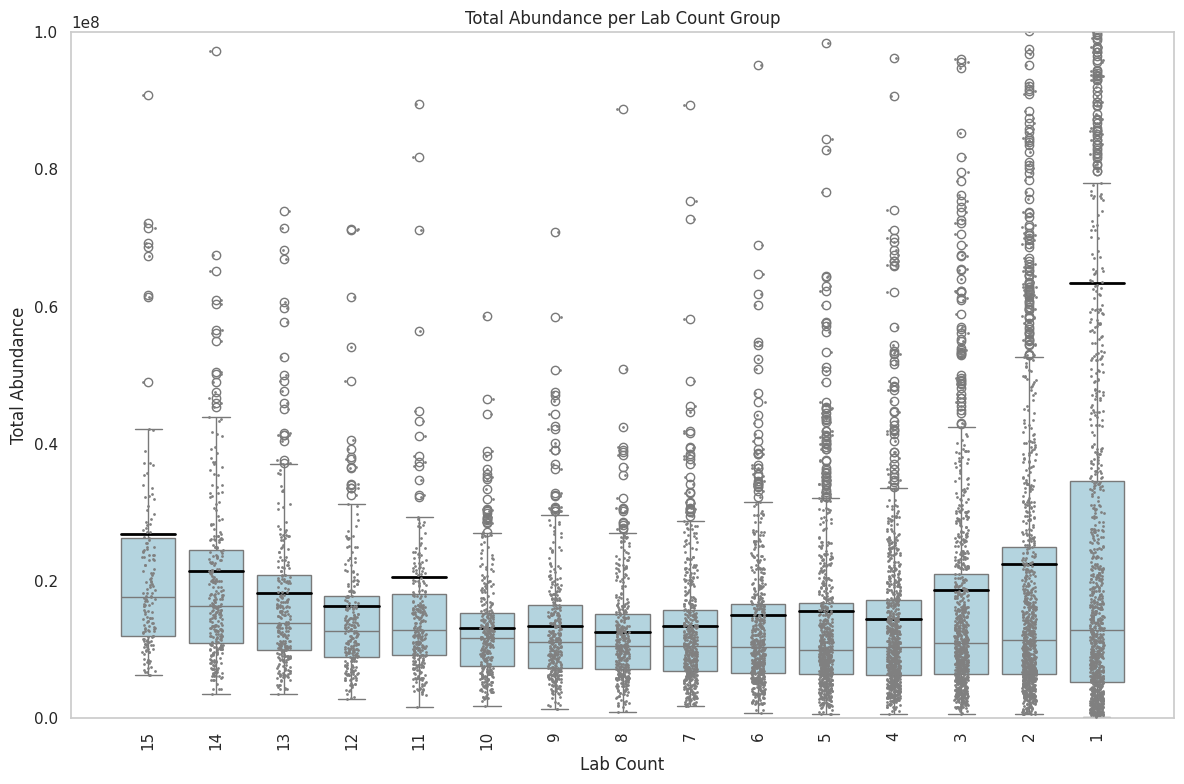

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the presence-absence grouped data
lab_df = pd.read_csv('lab_aggregated_featuretable_CMN.csv')

# Compute 'Lab_Count' by summing columns that contain 'Lab'
lab_columns = [col for col in lab_df.columns if 'Lab' in col]
lab_df['Lab_Count'] = lab_df[lab_columns].sum(axis=1)

# Load the modified feature table
feature_df = pd.read_csv('CMN_featuretable_reformated_blnkrem_transposed_format.csv')

# Identify sample columns (those containing '.mz')
sample_columns = [col for col in feature_df.columns if 'MS' in col]

# Compute 'Total_Abundance' by calculating mean while **ignoring zero values**
feature_df['Total_Abundance'] = feature_df[sample_columns].replace(0, pd.NA).mean(axis=1)

# Merge both DataFrames on 'row ID'
df = lab_df.merge(feature_df[['row ID', 'Total_Abundance']], on='row ID')

# Ensure 'Lab_Count' is a categorical variable, ordered from 15 to 1
df['Lab_Count'] = pd.Categorical(df['Lab_Count'], categories=list(range(15, 0, -1)), ordered=True)

# Plot boxplot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df,
    x='Lab_Count',
    y='Total_Abundance',
    color='lightblue'  # Set fill color to light blue without gradient
)

sns.stripplot(
    data=df,
    x='Lab_Count',
    y='Total_Abundance',
    color='grey',  # Change sample marker dots to grey
    size=2,
    jitter=True,  # Prevent overlapping dots
    ax=ax
)

# Calculate means and plot them as solid lines
means = df.groupby('Lab_Count')['Total_Abundance'].mean().values
for i, mean in enumerate(means):
    plt.plot([i - 0.4, i + 0.4], [mean, mean], color='black', linestyle='-', linewidth=2)

plt.title('Total Abundance per Lab Count Group')
plt.xlabel('Lab Count')
plt.ylabel('Total Abundance')
plt.ylim(0, 1E8)
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Total_Abundance_per_Lab_Count_boxplot_CMNaverage_nolog.svg')
plt.show()


# Cumucount

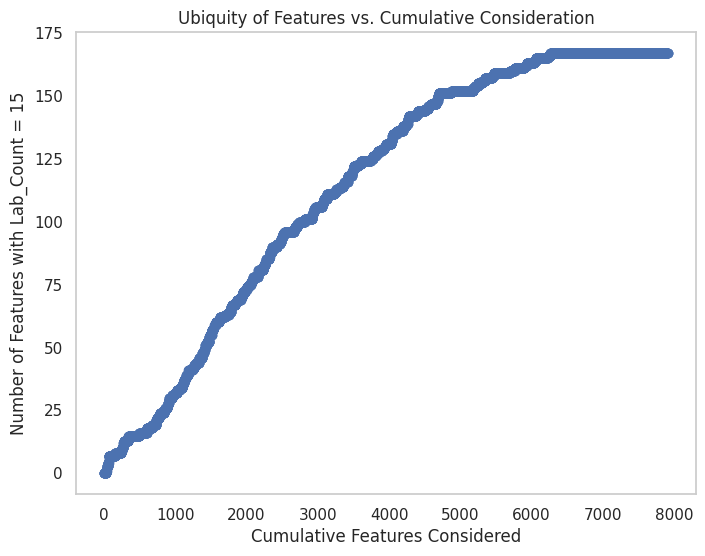

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the presence-absence grouped data
lab_df = pd.read_csv('lab_aggregated_featuretable_CMN.csv')

# 2. Compute 'Lab_Count' by summing columns that contain 'Lab'
lab_columns = [col for col in lab_df.columns if 'Lab' in col]
lab_df['Lab_Count'] = lab_df[lab_columns].sum(axis=1)

# 3. Load the modified feature table
feature_df = pd.read_csv('CMN_featuretable_reformated_blnkrem_transposed_format.csv')

# 4. Merge both DataFrames on 'row ID'
merged_df = feature_df.merge(lab_df[['row ID', 'Lab_Count']], on='row ID', how='left')

# 2. Identify sample columns (those containing '.mz')
sample_columns = [col for col in merged_df.columns if 'MS' in col]

# 3. Compute 'Total_Abundance' (ignoring zero values)
merged_df['Total_Abundance'] = merged_df[sample_columns].replace(0, pd.NA).mean(axis=1)

# 1. Sort the DataFrame by 'Total_Abundance' in descending order
sorted_df = merged_df.sort_values(by='Total_Abundance', ascending=False)

# 2. Initialize lists to store x and y values
x_values = np.arange(1, len(sorted_df) + 1)  # Cumulative features considered
y_values = [sorted_df.iloc[:i]['Lab_Count'].eq(15).sum() for i in x_values]  # Count of ubiquitous features

# 3. Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Cumulative Features Considered')
plt.ylabel('Number of Features with Lab_Count = 15')
plt.title('Ubiquity of Features vs. Cumulative Consideration')
plt.grid()
# Save the plot as an .svg file
plt.savefig('ubiquity_plot_FBMN_average.svg', format='svg')

plt.show()


# RF Merging features by annotation

In [12]:
import pandas as pd

# Step 1: Load and clean featuretable_reformated.csv
ft = pd.read_csv("featuretable_reformatted_precursorintensity.csv")
ft.columns = [col.replace(" Peak area", "") for col in ft.columns]

# Step 2: Load and rename column in merged_results_with_gnps.tsv
fbmn = pd.read_csv("merged_results_with_gnps.tsv", sep="\t")
fbmn = fbmn.rename(columns={"#Scan#": "row ID"})

# Step 3: Merge on 'row ID' (left join)
merged_df = pd.merge(ft, fbmn, on="row ID", how="left")

# Step 4: Save full merged DataFrame
merged_df.to_csv("FT_CMN.csv", index=False)

# Step 5: Filter to keep 'row ID' and columns containing '.mz'
filtered_df = merged_df[[col for col in merged_df.columns if col == "row ID" or ".mz" in col]]
filtered_df.to_csv("FT_CMN_short.csv", index=False)

In [13]:
import pandas as pd

# Step 1: Load the merged file
df = pd.read_csv("FT_CMN.csv")

# Step 2: Remove rows with missing 'Compound_Name'
df_filtered = df[df['Compound_Name'].notna() & (df['Compound_Name'] != "")]

# Step 3: Save the filtered DataFrame
df_filtered.to_csv("CMN_Only_LabIDs.csv", index=False)

/tmp/ipykernel_13999/2493914408.py:4: DtypeWarning: Columns (271) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FT_CMN.csv")


In [14]:
import pandas as pd

# Read clustersummary_with_groups.tsv into df1 and merged_results_with_gnps.tsv into df2
df1 = pd.read_csv("CMN_Only_LabIDs.csv", encoding='ISO-8859-1')
df2 = pd.read_csv("taglist.csv", encoding='ISO-8859-1')

# Merge dataframes based on the columns "row ID" in df1 and "#Scan#" in df2
merged_df = pd.merge(df1, df2, left_on="Compound_Name", right_on="Compound_Name_GNPS", how="left")

# Fill blank cells in 'Assigned name' with values from 'Compound_Name'
merged_df['Assigned name'] = merged_df['Assigned name'].fillna(merged_df['Compound_Name'])

# Save the output as gnpsmergedtable05.csv
merged_df.to_csv("CMN_Only_LabIDs_tagged.csv", index=False)

print("Filtered dataframe saved as gnpsmergedtable05.csv")

Filtered dataframe saved as gnpsmergedtable05.csv


In [15]:
import pandas as pd

# Step 1: Load the tagged file
df = pd.read_csv("CMN_Only_LabIDs_tagged.csv")

# Step 2: Keep only columns with '.mz', 'row ID', and 'Assigned name'
columns_to_keep = [col for col in df.columns if ".mz" in col or col in ["row ID", "Assigned name"]]
df_filtered = df[columns_to_keep]

# Step 3: Rename 'Assigned name' to 'Compound_Name'
df_filtered = df_filtered.rename(columns={"Assigned name": "Compound_Name"})

# Step 4: Remove duplicate rows
df_filtered = df_filtered.drop_duplicates()

# Step 5: Save the filtered DataFrame
df_filtered.to_csv("CMN_Only_LabIDs_tagged_SHORT.csv", index=False)

In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('CMN_Only_LabIDs_tagged_SHORT.csv')

# Identify columns with ".mz" in their headers
mz_columns = [col for col in df.columns if ".mz" in col]

# Group by 'Compound_Name' and aggregate
aggregated_df = df.groupby('Compound_Name').agg(
    {**{col: 'sum' for col in mz_columns},
     **{col: lambda x: '_'.join(x.astype(str)) for col in df.columns if col not in mz_columns + ['Compound_Name']}}
).reset_index()

# Rename 'row ID' to 'merged_IDs' and add new sequential 'row ID'
aggregated_df = aggregated_df.rename(columns={"row ID": "merged_IDs"})
aggregated_df.insert(0, "row ID", range(1, len(aggregated_df) + 1))

# Save the aggregated DataFrame to a new CSV file
aggregated_df.to_csv('aggregated_CMN_Only_LabIDs.csv', index=False)

print("The rows have been aggregated and saved to 'aggregated_FBMN_Only_LabIDs.csv'.")

The rows have been aggregated and saved to 'aggregated_FBMN_Only_LabIDs.csv'.


In [17]:
import pandas as pd

# Load the aggregated feature table
features_df = pd.read_csv('aggregated_CMN_Only_LabIDs.csv', encoding='ISO-8859-1')

# Load the metadata file
metadata_df = pd.read_csv('merged_metadata.tsv', sep='\t', encoding='ISO-8859-1')

# Extract sample columns from the feature table that match filenames in metadata
sample_columns = [col for col in features_df.columns if col in metadata_df['filename'].values]

# Map each filename to its corresponding lab
filename_to_lab = metadata_df.set_index('filename')['ATTRIBUTE_Lab'].to_dict()

# Group sample columns by lab
lab_groups = {}
for col in sample_columns:
    lab = filename_to_lab.get(col)
    if lab is not None:
        lab_groups.setdefault(lab, []).append(col)

# Split the feature table by lab and save each subset
for lab, cols in lab_groups.items():
    # Include non-sample columns (e.g., metadata, identifiers)
    non_sample_cols = [col for col in features_df.columns if col not in sample_columns]
    subset_df = features_df[non_sample_cols + cols]

    # Drop 'Compound_Name' and 'merged_IDs' if present
    subset_df = subset_df.drop(columns=['Compound_Name', 'merged_IDs'], errors='ignore')

    # Save to CSV
    output_filename = f'CMN_aggregated_by_lab_{lab}.csv'
    subset_df.to_csv(output_filename, index=False)
    print(f"✅ Saved lab {lab} subset to '{output_filename}' without Compound_Name and merged_IDs")

✅ Saved lab 5 subset to 'CMN_aggregated_by_lab_5.csv' without Compound_Name and merged_IDs
✅ Saved lab 26 subset to 'CMN_aggregated_by_lab_26.csv' without Compound_Name and merged_IDs
✅ Saved lab 6 subset to 'CMN_aggregated_by_lab_6.csv' without Compound_Name and merged_IDs
✅ Saved lab 7 subset to 'CMN_aggregated_by_lab_7.csv' without Compound_Name and merged_IDs
✅ Saved lab 8 subset to 'CMN_aggregated_by_lab_8.csv' without Compound_Name and merged_IDs
✅ Saved lab 22 subset to 'CMN_aggregated_by_lab_22.csv' without Compound_Name and merged_IDs
✅ Saved lab 16 subset to 'CMN_aggregated_by_lab_16.csv' without Compound_Name and merged_IDs
✅ Saved lab 19 subset to 'CMN_aggregated_by_lab_19.csv' without Compound_Name and merged_IDs
✅ Saved lab 30 subset to 'CMN_aggregated_by_lab_30.csv' without Compound_Name and merged_IDs
✅ Saved lab 9 subset to 'CMN_aggregated_by_lab_9.csv' without Compound_Name and merged_IDs
✅ Saved lab 15 subset to 'CMN_aggregated_by_lab_15.csv' without Compound_Name an

# RF analysis. The output files from the previous section were individually analyzed on the FBMN stats app, with blank subtraction (0.3 filter setting), imputation and TIC normalization 

In [18]:
import pandas as pd
import os

# List only CSV files that contain 'RF_IDmerged' in their filenames
csv_files = [file for file in os.listdir() if file.endswith('.csv') and '_RF' in file]

# Create an empty dictionary to store the ID counts and presence in each file
id_dict = {}

# Iterate over each filtered CSV file
for file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Check if both 'metabolite' and 'importance' columns exist
    if 'metabolite' in df.columns and 'importance' in df.columns:
        # Filter rows where importance > 0
        filtered_df = df[df['importance'] > 0]
        
        # Iterate over each qualifying metabolite ID
        for id_value in filtered_df['metabolite']:
            # If the ID is already in the dictionary, update its count and presence
            if id_value in id_dict:
                id_dict[id_value]['count'] += 1
                id_dict[id_value][file] = 'yes'
            # If the ID is not in the dictionary, add it with initial count and presence
            else:
                id_dict[id_value] = {'count': 1, file: 'yes'}

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame.from_dict(id_dict, orient='index').fillna('no')

# Save the summary DataFrame to a new CSV file
summary_df.to_csv('id_summary.csv')

print("Filtered summary of 'metabolite' values with importance > 0 has been saved to 'id_summary.csv'.")

Filtered summary of 'metabolite' values with importance > 0 has been saved to 'id_summary.csv'.


In [19]:
import pandas as pd
import os

# List only CSV files that contain 'RF_LIB_FBMN' in their filenames
csv_files = [file for file in os.listdir() if file.endswith('.csv') and '_RF' in file]

# Create an empty dictionary to store metabolite counts, file presence, and summed importance
id_dict = {}

# Iterate over each filtered CSV file
for file in csv_files:
    df = pd.read_csv(file)

    # Check if required columns exist
    if 'metabolite' in df.columns and 'importance' in df.columns:
        df = df[df['importance'] > 0]  # Remove rows where importance is zero

        # Update dictionary with cumulative importance tracking
        for _, row in df.iterrows():
            id_value = row['metabolite']
            importance_value = row['importance']

            if id_value in id_dict:
                id_dict[id_value]['count'] += 1
                id_dict[id_value]['total_importance'] += importance_value
                id_dict[id_value][file] = 'yes'
            else:
                id_dict[id_value] = {'count': 1, 'total_importance': importance_value, file: 'yes'}

# Convert dictionary to DataFrame
summary_df = pd.DataFrame.from_dict(id_dict, orient='index').fillna('no')

# Compute ranks based on total importance divided by 15 (highest score gets Rank 1)
summary_df['rank'] = (summary_df['total_importance'] / 15).rank(method='dense', ascending=False)

# Remove the 'total_importance' column but keep the presence columns ('yes'/'no' for each file)
presence_cols = [col for col in summary_df.columns if col not in ['total_importance', 'rank', 'count']]
summary_df = summary_df[['count', 'rank'] + presence_cols]

# Sort by rank (Rank 1 = highest importance)
summary_df.sort_values(by='rank', inplace=True)

# Save to CSV
summary_df.to_csv('ranked_importance_summary.csv')

print("The ranked importance summary has been saved to 'ranked_importance_summary.csv'. This is used to rank the overall main drivers.")

The ranked importance summary has been saved to 'ranked_importance_summary.csv'. This is used to rank the overall main drivers.
